<a href="https://colab.research.google.com/github/evroth/gsb545repo/blob/main/PA_keras_wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practice Activity: Keras

Classify a wine's nation of origin using neural networks in Keras.

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn import preprocessing

## The Data

In [2]:
wine = pd.read_csv("cleansingWine.csv")

<ipython-input-2-294373946f8f>:1: DtypeWarning: Columns (8,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  wine = pd.read_csv("cleansingWine.csv")


In [3]:
wine.dtypes

Unnamed: 0      int64
id              int64
name           object
producer       object
nation         object
local1         object
local2         object
local3         object
local4         object
varieties1     object
varieties2     object
varieties3     object
varieties4     object
varieties5     object
varieties6     object
varieties7     object
varieties8     object
varieties9     object
varieties10    object
varieties11    object
varieties12    object
type           object
use            object
abv            object
degree         object
sweet          object
acidity        object
body           object
tannin         object
price           int64
year            int64
ml              int64
dtype: object

In [4]:
wine = wine.drop(wine.columns[0], axis=1)
wine = wine.drop(wine.columns[0], axis=1)
wine.sample(5)

,name,producer,nation,local1,local2,local3,local4,varieties1,varieties2,varieties3,...,use,abv,degree,sweet,acidity,body,tannin,price,year,ml
2127,Pierre Jean Bordeaux Blanc,Pierre Jean,France,Bordeaux,NaN,NaN,NaN,Sauvignon blanc,Semillon,Muscatel,...,Table,11.5,9~12,SWEET1,ACIDITY3,BODY2,TANNIN1,0,2004,750
11255,Chateau La Croix Saint Georges,JeanPhilippe Janoueix,France,Bordeaux,Pomerol,NaN,NaN,Merlot,Cabernet Franc,NaN,...,Table,13,16~18,SWEET1,ACIDITY3,BODY5,TANNIN4,0,2007,750
15317,"Chacra, 32 Treinta y Dos",Bodega Chacra,Argentina,Rio Negro,Patagonia,NaN,NaN,Pinot Noir,NaN,NaN,...,Table,13~14,15~17,SWEET1,ACIDITY3,BODY4,TANNIN4,396000,2018,750
16798,"Kendermann, Black Tower Classic Riesling",Kendermann Reh Kendermann Kendermanns,Germany,Pfalz,NaN,NaN,NaN,Riesling,NaN,NaN,...,Table,12,6~8,SWEET2,ACIDITY3,BODY2,TANNIN1,20000,0,750
11553,"Chateau du Meursault, Meursault du Chateau",Chateau du Meursault,France,Bourgogne,Cote de Beaune,Meursault,NaN,Chardonnay,NaN,NaN,...,Table,13,8~10,SWEET1,ACIDITY4,BODY3,TANNIN1,0,2011,750


## Cleaning the Data

In [5]:
wine = wine[wine['year'] != 0]
wine = wine[wine['price'] != 0]

In [7]:
wine.describe()

,price,year,ml
count,1.106900e+04,11069.000000,11069.000000
mean,1.688665e+05,2012.357395,745.967567
std,3.291202e+05,4.974603,95.796495
min,3.900000e+03,1976.000000,100.000000
25%,4.500000e+04,2009.000000,750.000000
50%,7.800000e+04,2014.000000,750.000000
75%,1.680000e+05,2017.000000,750.000000
max,8.000000e+06,2020.000000,6000.000000


In [8]:
wine.isna().sum()

name               0
producer           0
nation             0
local1           223
local2          4766
local3          8845
local4         11069
varieties1       132
varieties2      7254
varieties3      8970
varieties4     10333
varieties5     10862
varieties6     11014
varieties7     11052
varieties8     11061
varieties9     11065
varieties10    11065
varieties11    11066
varieties12    11067
type              14
use                6
abv             3681
degree          3681
sweet              2
acidity            0
body               0
tannin             0
price              0
year               0
ml                 0
dtype: int64

In [6]:
df = wine

In [7]:
df['local1'].fillna(value="None", inplace=True)
df['local2'].fillna(value="None", inplace=True)
df['local3'].fillna(value="None", inplace=True)
df['local4'].fillna(value="None", inplace=True)
df['varieties1'].fillna(value="None", inplace=True)
df['varieties2'].fillna(value="None", inplace=True)
df['varieties3'].fillna(value="None", inplace=True)
df = df.drop(columns=['varieties4', 'varieties5', 'varieties6', 'varieties7','varieties8','varieties9','varieties10','varieties11','varieties12'])
df.dropna(subset=['type'], inplace=True)
df.dropna(subset=['use'], inplace=True)
df.dropna(subset=['sweet'], inplace=True)
df['abv'].fillna(value="None", inplace=True)
df['degree'].fillna(value="None", inplace=True)

In [11]:
df.describe(include = ['object'])

,name,producer,nation,local1,local2,local3,local4,varieties1,varieties2,varieties3,type,use,abv,degree,sweet,acidity,body,tannin
count,11047,11047,11047,11047,11047,11047,11047,11047,11047,11047,11047,11047,11047,11047,11047,11047,11047,11047
unique,11025,2883,27,161,241,140,1,261,189,147,6,9,119,64,5,5,5,5
top,"Sine Qua Non, Shakti Grenache",Sine Qua Non,France,California,None,None,None,Cabernet Sauvignon,None,None,Red,Table,None,None,SWEET1,ACIDITY3,BODY3,TANNIN3
freq,2,52,3466,1488,4753,8827,11047,1634,7235,8949,7643,9777,3672,3672,10165,5823,4584,3650


## Exploratory Analysis

See PA_NN_Wine.ipynb for this, same data.

In [8]:
def extract_average_abv(abv_value):
    if '~' in abv_value:
        # split the 'abv_value' into two parts using the tilde character
        left_num, right_num = abv_value.split('~')
        # convert the two parts into floats and take their average
        return str((float(left_num) + float(right_num)) / 2)
    else:
        # if the 'abv_value' does not contain a tilde, return the original value as a float
        return str(abv_value)

# apply the 'extract_average_abv' function to the 'abv' column to create a new column with the extracted averages
df['modded_abv'] = df['abv'].apply(extract_average_abv)

In [9]:
df = df.drop(columns=['name'])
df = df.drop(columns=['abv'])

In [10]:
df

,producer,nation,local1,local2,local3,local4,varieties1,varieties2,varieties3,type,use,degree,sweet,acidity,body,tannin,price,year,ml,modded_abv
0,Altair,Chile,Rapel Valley,None,None,None,Cabernet Sauvignon,Carmenere,Merlot,Red,Table,17~19,SWEET1,ACIDITY4,BODY5,TANNIN4,220000,2014,750,14.5
1,Altair,Chile,Rapel Valley,None,None,None,Cabernet Sauvignon,Merlot,Carmenere,Red,Table,16~18,SWEET1,ACIDITY3,BODY4,TANNIN4,110000,2016,750,14.5
7,Calvet,France,Bordeaux,None,None,None,Merlot,Cabernet Sauvignon,None,Red,Table,16~18,SWEET1,ACIDITY3,BODY2,TANNIN3,21000,2011,750,13.5
8,Calvet,France,Bordeaux,None,None,None,Sauvignon blanc,Semillon,Muscadet,White,Table,9~11,SWEET1,ACIDITY4,BODY2,TANNIN1,21000,2010,750,11.5
9,Calvet,France,Southern France,Languedoc Roussillon,None,None,Cabernet Sauvignon,None,None,Red,Table,16~18,SWEET1,ACIDITY3,BODY2,TANNIN3,19000,2017,750,13.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21586,Vincent Ledy,France,Bourgogne,Cote de Nuits,None,None,Pinot Noir,None,None,Red,Table,None,SWEET1,ACIDITY4,BODY3,TANNIN3,109000,2017,750,None
21597,Miguel Torres,Chile,Curico Valley,None,None,None,Sauvignon blanc,None,None,White,"Appetizer, Table",8~10,SWEET1,ACIDITY4,BODY2,TANNIN1,40000,2020,750,13.5
21602,Leopards Leap,the Republic of South Africa,Western Cape,None,None,None,Chardonnay,Pinot Noir,None,Rose,"Appetizer, Table",10~12,SWEET1,ACIDITY3,BODY2,TANNIN1,40000,2020,750,12.5
21603,Leopards Leap,the Republic of South Africa,Coastal Region,Paarl,Wellington,None,Chardonnay,None,None,White,"Appetizer, Table",10~12,SWEET1,ACIDITY3,BODY2,TANNIN1,40000,2020,750,12.5


## Data Preprocessing

Note that this is slightly different pre-processing than done in PA_NN_Wine.ipynb

## Building Models

In [13]:
from sklearn.preprocessing import LabelEncoder

# label encoding for categorical variables
le = LabelEncoder()
df['producer'] = le.fit_transform(df['producer'])
df['nation'] = le.fit_transform(df['nation'])
df['local1'] = le.fit_transform(df['local1'])
df['local2'] = le.fit_transform(df['local2'])
df['local3'] = le.fit_transform(df['local3'])
df['local4'] = le.fit_transform(df['local4'])
df['varieties1'] = le.fit_transform(df['varieties1'])
df['varieties2'] = le.fit_transform(df['varieties2'])
df['varieties3'] = le.fit_transform(df['varieties3'])
df['type'] = le.fit_transform(df['type'])
df['use'] = le.fit_transform(df['use'])
df['degree'] = le.fit_transform(df['degree'])
df['sweet'] = le.fit_transform(df['sweet'])
df['acidity'] = le.fit_transform(df['acidity'])
df['body'] = le.fit_transform(df['body'])
df['tannin'] = le.fit_transform(df['tannin'])
df['modded_abv'] = le.fit_transform(df['modded_abv'])

In [19]:
df_2 = df
df_2['price'] = np.log(df_2['price'])

In [21]:
# Separate features and target variable
X2 = df_2.drop(['price'], axis=1)
y2 = df_2['price']

In [22]:
scaler = StandardScaler()
X2_scaled = scaler.fit_transform(X2)

In [24]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2_scaled, y2, test_size=0.2, random_state=42)

In [25]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [27]:
pip install tensorflow_addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.0/591.0 kB 9.8 MB/s eta 0:00:00


In [28]:
from tensorflow_addons.metrics import RSquare

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


**Model 1: Recreating NN from scikit in Keras**

In [36]:
# Standardize the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X2_train)
X_test_scaled = scaler.transform(X2_test)

# Define the model architecture
model = Sequential()
model.add(Dense(1000, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics = [tf.keras.metrics.RootMeanSquaredError(),RSquare()])

# Train the model
model.fit(X_train_scaled, y2_train, epochs=10, verbose=0)


model.evaluate(X_test_scaled, y2_test, verbose=2)


70/70 - 0s - loss: 0.5519 - root_mean_squared_error: 0.7429 - r_square: 0.4814 - 259ms/epoch - 4ms/step


[0.551929235458374, 0.742919385433197, 0.48143434524536133]

After 10 epochs, the validation RMSE is .7429 and R^2 of .481. These are a bit worse than the model we built using scikit learn. This could perhaps be because I did not specify the model completely correct, or because I did not let it run for enough epochs. The latter doesn't seem true since it was only improving marginally in each of the last few epochs.

I am really interested in learning how to do this properly so it would be great to spend time building these models from scratch because it is a little confusing.

**Model 2: Keras to Predict Nation**

slight change to preprocessing

In [75]:
# Separate features and target variable
X = df.drop(['nation'], axis=1)
y = df['nation']

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Perform label encoding on the target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Standardize the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Define the number of classes
num_classes = len(label_encoder.classes_)

# Define the model architecture
model = Sequential()
model.add(Dense(1000, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train_encoded, epochs=100, verbose=1)


# Perform the same preprocessing steps on the test data
X_test_scaled = scaler.transform(X_test)
y_test_encoded = label_encoder.transform(y_test)

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test_scaled, y_test_encoded, verbose=0)
print("Loss: {:.2f}".format(loss))
print("Accuracy: {:.2f}".format(accuracy))


Epoch 1/100
277/277 [==============================] - 1s 3ms/step - loss: 1.4774 - accuracy: 0.5363
Epoch 2/100
277/277 [==============================] - 1s 3ms/step - loss: 1.1500 - accuracy: 0.6285
Epoch 3/100
277/277 [==============================] - 1s 3ms/step - loss: 1.0479 - accuracy: 0.6644
Epoch 4/100
277/277 [==============================] - 1s 4ms/step - loss: 0.9800 - accuracy: 0.6864
Epoch 5/100
277/277 [==============================] - 1s 4ms/step - loss: 0.9308 - accuracy: 0.6966
Epoch 6/100
277/277 [==============================] - 1s 4ms/step - loss: 0.8928 - accuracy: 0.7054
Epoch 7/100
277/277 [==============================] - 1s 3ms/step - loss: 0.8563 - accuracy: 0.7171
Epoch 8/100
277/277 [==============================] - 1s 3ms/step - loss: 0.8310 - accuracy: 0.7204
Epoch 9/100
277/277 [==============================] - 1s 3ms/step - loss: 0.8021 - accuracy: 0.7334
Epoch 10/100
277/277 [==============================] - 1s 3ms/step - loss: 0.7776 - accura

70/70 [==============================] - 0s 2ms/step


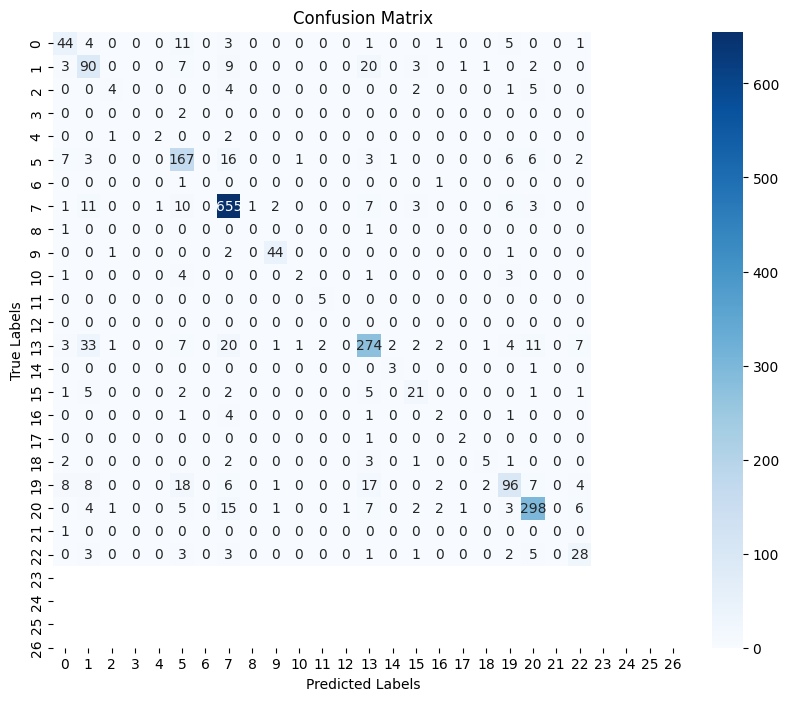

In [78]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict the labels for the test data
y_test_pred = model.predict(X_test_scaled)
y_test_pred_labels = label_encoder.inverse_transform(y_test_pred.argmax(axis=1))
y_test_true_labels = label_encoder.inverse_transform(y_test_encoded)

# Create the confusion matrix
cm = confusion_matrix(y_test_true_labels, y_test_pred_labels)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

From this model, we see that we have an accuracy of .79 on the test set. This I believe to be pretty decent given that there are 27 different nations they could be from, with the top being france occuring 3500 times.

Though this model does use variables in the dataset such as producer and local, which may directly be linked to the nation the wine was produced. Perhaps those should have been dropped. If they did map one to one, I would imagine the NN would be much more accurate since a producer may only may make wine in one nation. For example Calvet could only make wine in France so then if the model saw the producer was calvet it could

In [64]:
df.loc[df['producer'] == 398]

,producer,nation,local1,local2,local3,local4,varieties1,varieties2,varieties3,type,use,degree,sweet,acidity,body,tannin,price,year,ml,modded_abv
7,398,8,9,147,88,0,131,31,82,2,6,31,0,2,1,2,9.952278,2011,750,37
8,398,8,9,147,88,0,210,157,78,5,6,61,0,3,1,0,9.952278,2010,750,8
9,398,8,129,103,88,0,32,117,82,2,6,31,0,2,1,2,9.852194,2017,750,37
10,398,8,129,103,88,0,131,117,82,2,6,31,0,2,2,2,9.852194,2011,750,37
11,398,8,9,147,88,0,210,157,39,5,6,61,0,3,1,0,10.239960,2011,750,8
12,398,8,9,168,88,0,213,151,78,5,4,3,1,3,2,0,9.798127,2009,750,27
14,398,8,9,124,88,0,32,98,18,2,6,31,0,3,2,2,10.373491,2015,750,19
15,398,8,9,182,88,0,131,30,82,2,6,31,0,2,1,1,10.645425,2010,750,19
6514,398,8,9,147,88,0,131,31,82,2,6,31,0,2,2,2,10.373491,2016,750,19
8939,398,8,107,66,88,0,221,68,146,2,6,31,0,2,2,2,10.308953,2016,750,56


Looking at this one example now, I actually think this model may suck.

**Model 3: Previous Model but without producer and less epochs for time**

In [79]:
# Separate features and target variable
X = df.drop(['nation','producer'], axis=1)
y = df['nation']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [80]:
# Perform label encoding on the target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Standardize the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Define the number of classes
num_classes = len(label_encoder.classes_)

# Define the model architecture
model = Sequential()
model.add(Dense(1000, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train_encoded, epochs=50, verbose=1)


# Perform the same preprocessing steps on the test data
X_test_scaled = scaler.transform(X_test)
y_test_encoded = label_encoder.transform(y_test)

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test_scaled, y_test_encoded, verbose=0)
print("Loss: {:.2f}".format(loss))
print("Accuracy: {:.2f}".format(accuracy))

Epoch 1/50
277/277 [==============================] - 1s 3ms/step - loss: 1.4988 - accuracy: 0.5346
Epoch 2/50
277/277 [==============================] - 1s 5ms/step - loss: 1.1921 - accuracy: 0.6175
Epoch 3/50
277/277 [==============================] - 1s 5ms/step - loss: 1.0990 - accuracy: 0.6473
Epoch 4/50
277/277 [==============================] - 1s 3ms/step - loss: 1.0359 - accuracy: 0.6646
Epoch 5/50
277/277 [==============================] - 1s 3ms/step - loss: 0.9895 - accuracy: 0.6789
Epoch 6/50
277/277 [==============================] - 1s 4ms/step - loss: 0.9512 - accuracy: 0.6916
Epoch 7/50
277/277 [==============================] - 1s 5ms/step - loss: 0.9163 - accuracy: 0.6973
Epoch 8/50
277/277 [==============================] - 1s 3ms/step - loss: 0.8885 - accuracy: 0.7051
Epoch 9/50
277/277 [==============================] - 1s 3ms/step - loss: 0.8625 - accuracy: 0.7161
Epoch 10/50
277/277 [==============================] - 1s 3ms/step - loss: 0.8365 - accuracy: 0.7223

70/70 [==============================] - 0s 2ms/step


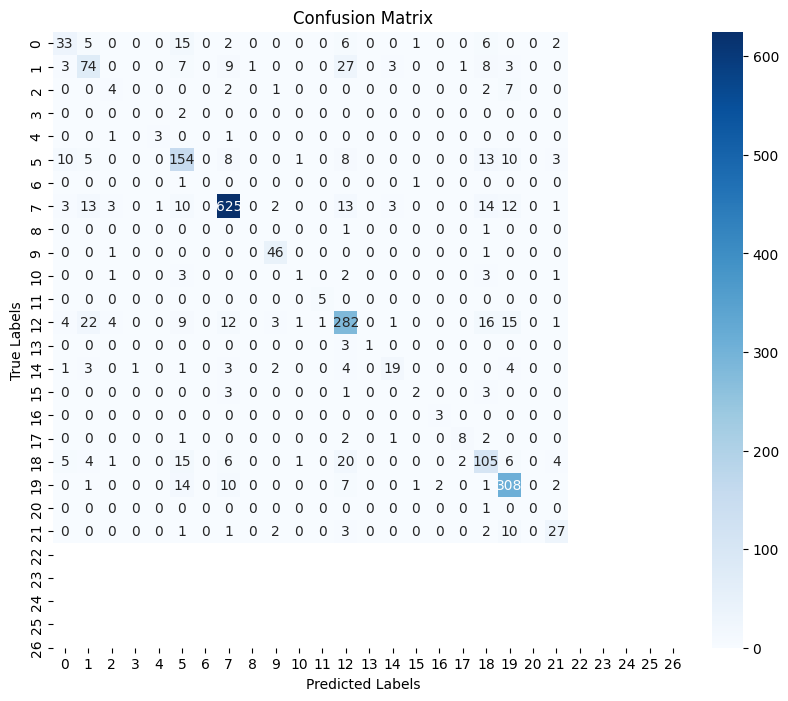

In [81]:
# Predict the labels for the test data
y_test_pred = model.predict(X_test_scaled)
y_test_pred_labels = label_encoder.inverse_transform(y_test_pred.argmax(axis=1))
y_test_true_labels = label_encoder.inverse_transform(y_test_encoded)

# Create the confusion matrix
cm = confusion_matrix(y_test_true_labels, y_test_pred_labels)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

This model has an accuracy of .77; I think this is pretty good given that we got rid of producer. I still think the local gives a pretty easy way to classify what country the wine was produced in but apparently it isn't one to one. Else this model would be perfect. But perhaps again I am just doing it wrong, could have to do with the label encoder not making the catagories actual catagories and the model treates the numbers as actual numbers not distinct groups. That last part is one thing that really bothers me about these models, I wish there was a way to encode the variables without making dummy variables because that creates way too many columns with this dataset!

**Model 4: Retrying Model 1 to improve R^2 of model**

In [68]:
# Separate features and target variable
X = df.drop(['price'], axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
# Standardize the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Define the model architecture
model = Sequential()
model.add(Dense(1000, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_scaled, y_train, epochs=100, verbose=1)

# Perform the same preprocessing steps on the test data
X_test_scaled = scaler.transform(X_test)

# Evaluate the model on the test data
y_test_pred = model.predict(X_test_scaled).flatten()
mse = np.mean((y_test - y_test_pred)**2)
y_test_mean = np.mean(y_test)
ssr = np.sum((y_test - y_test_pred)**2)
sst = np.sum((y_test - y_test_mean)**2)
r2_score = 1 - (ssr / sst)
print("R^2 Score: {:.2f}".format(r2_score))


Epoch 1/100
277/277 [==============================] - 2s 3ms/step - loss: 14.9796
Epoch 2/100
277/277 [==============================] - 1s 3ms/step - loss: 1.1242
Epoch 3/100
277/277 [==============================] - 1s 2ms/step - loss: 0.8144
Epoch 4/100
277/277 [==============================] - 1s 2ms/step - loss: 0.7000
Epoch 5/100
277/277 [==============================] - 1s 2ms/step - loss: 0.6288
Epoch 6/100
277/277 [==============================] - 1s 2ms/step - loss: 0.5789
Epoch 7/100
277/277 [==============================] - 1s 2ms/step - loss: 0.5579
Epoch 8/100
277/277 [==============================] - 1s 2ms/step - loss: 0.5118
Epoch 9/100
277/277 [==============================] - 1s 2ms/step - loss: 0.4979
Epoch 10/100
277/277 [==============================] - 1s 4ms/step - loss: 0.7408
Epoch 11/100
277/277 [==============================] - 1s 3ms/step - loss: 0.4884
Epoch 12/100
277/277 [==============================] - 1s 2ms/step - loss: 0.4905
Epoch 13/100

Nice, this one got pretty much the same R^2 as the one from scikit learn; .6 compared to .59 from the previous week.

## Conclusion

I could use some more practice playing around with different tuning parameters for these models and the variaous different set ups I can create with them. There are many confusing pieces to Keras so I am interested in learning more over the next few weeks.

In the mean time, I was able to create a comperable neural net in Keras that slightly outperformed. Moving forward I will make sure to include more metrics because I just read I needed 3. That isn't a hard add but I do not have time to go back and add more in right now.